# Preminary operations

Let us start by importing the relevant packages

In [57]:
import gcp.bigquery as bq
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sn

## Let us explore the dataset

In [3]:
%%sql 
SELECT * FROM [google.com:ddm-connectors-demo:aw_dataset.__TABLES__];

project_id,dataset_id,table_id,creation_time,last_modified_time,row_count,size_bytes,type
google.com:ddm-connectors-demo,aw_dataset,ACCOUNT_PERFORMANCE_DEVICE,1462865492924,1462865646222,344872,213766803,1
google.com:ddm-connectors-demo,aw_dataset,ACCOUNT_PERFORMANCE_HOUR_OF_DAY,1462866241157,1462868328687,7585976,4293195830,1
google.com:ddm-connectors-demo,aw_dataset,CAMPAIGN_PERFORMANCE_DEVICE,1462882853869,1462884926720,12818403,11156943261,1
google.com:ddm-connectors-demo,aw_dataset,CAMPAIGN_PERFORMANCE_GA,1462886351515,1462888587490,12818403,11092304675,1
google.com:ddm-connectors-demo,aw_dataset,CAMPAIGN_PERFORMANCE_HOUR_OF_DAY,1462890199029,1462910444516,149020493,120843835228,1
google.com:ddm-connectors-demo,aw_dataset,KEYWORDS_PERFORMANCE_ANALYTICS,1462965362235,1463059120058,295426051,435427263267,1
google.com:ddm-connectors-demo,aw_dataset,KEYWORDS_PERFORMANCE_DEVICE,1463050362280,1463408383328,447387461,631380449113,1


## Lest us explore the table KEYWORDS_PERFORMANCE_ANALYTICS

In [8]:
%bigquery schema --table google.com:ddm-connectors-demo:aw_dataset.KEYWORDS_PERFORMANCE_ANALYTICS

## Let us see how the data look like

In [9]:
%bigquery sample --table google.com:ddm-connectors-demo:aw_dataset.KEYWORDS_PERFORMANCE_ANALYTICS --count 5

AccountCurrencyCode,AccountDescriptiveName,AccountTimeZoneId,ActiveViewCpm,ActiveViewCtr,ActiveViewImpressions,ActiveViewMeasurability,ActiveViewMeasurableCost,ActiveViewMeasurableImpressions,ActiveViewViewability,AdGroupId,AdGroupName,AdGroupStatus,AdNetworkType1,AdNetworkType2,AllConversionRate,AllConversions,AllConversionValue,ApprovalStatus,AverageCost,AverageCpc,AverageCpe,AverageCpm,AverageCpv,AveragePageviews,AveragePosition,AverageTimeOnSite,BaseAdGroupId,BaseCampaignId,BiddingStrategyId,BiddingStrategyName,BiddingStrategySource,BiddingStrategyType,BidType,BounceRate,CampaignId,CampaignName,CampaignStatus,ClickAssistedConversionsOverLastClickConversions,ClickAssistedConversionValue,ClickConversionRate,Clicks,ConversionRate,Conversions,ConversionValue,ConvertedClicks,Cost,CostPerAllConversion,CostPerConversion,CostPerConvertedClick,CpcBid,CpcBidSource,CpmBid,CreativeQualityScore,Criteria,CriteriaDestinationUrl,CrossDeviceConversions,Ctr,CustomerDescriptiveName,Date,DayOfWeek,EngagementRate,Engagements,EnhancedCpcEnabled,EstimatedAddClicksAtFirstPositionCpc,EstimatedAddCostAtFirstPositionCpc,ExternalCustomerId,FinalAppUrls,FinalMobileUrls,FinalUrls,FirstPageCpc,FirstPositionCpc,GmailForwards,GmailSaves,GmailSecondaryClicks,Id,ImpressionAssistedConversions,ImpressionAssistedConversionsOverLastClickConversions,ImpressionAssistedConversionValue,Impressions,InteractionRate,Interactions,IsNegative,KeywordMatchType,LabelIds,Labels,Month,MonthOfYear,PercentNewVisitors,PostClickQualityScore,PrimaryCompanyName,QualityScore,Quarter,SearchExactMatchImpressionShare,SearchImpressionShare,SearchPredictedCtr,SearchRankLostImpressionShare,Status,SystemServingStatus,TopOfPageCpc,TrackingUrlTemplate,UrlCustomParameters,ValuePerAllConversion,ValuePerConversion,ValuePerConvertedClick,VideoQuartile100Rate,VideoQuartile25Rate,VideoQuartile50Rate,VideoQuartile75Rate,VideoViewRate,VideoViews,ViewThroughConversions,Week,Year
EUR,Bravofly Russia Voli,(GMT+01:00) Rome,0,0.00%,0,0.00%,0,0,0.00%,10139184698,Volagratis,enabled,Search Network,Google search,0.00%,0.0,0.0,--,0,0,0,0,0,0.0,2.7,0,10139184698,108030218,0,--,campaign,cpc,--,0.00%,108030218,Brand_RU_Broad,enabled,0.0,0.0,0.00%,0,0.00%,0.0,0.0,0,0,0,0,0,--,--,--,Not applicable,vola gratis,--,0.0,0.00%,Bravofly Russia Voli,2015-07-11,Saturday,0.00%,0,False,--,--,9837210897,--,--,--,0,0,0,0,0,297004287,0,0.0,0.0,3,0.00%,0,False,Broad,--,--,2015-07-01,July,0.00%,Not applicable,"Red Universal de Marketing y Bookings On Line, S.A.",0,2015-07-01,--,75.00%,Not applicable,25.00%,removed,--,0,--,--,0.0,0.0,0.0,0.00%,0.00%,0.00%,0.00%,0.00%,0,0,2015-07-06,2015
EUR,Bravofly Russia Voli,(GMT+01:00) Rome,0,0.00%,0,0.00%,0,0,0.00%,3639849698,Bravoavia,enabled,Search Network,Google search,0.00%,0.0,0.0,--,0,0,0,0,0,0.0,1.0,0,3639849698,108030218,0,--,campaign,cpc,--,0.00%,108030218,Brand_RU_Broad,enabled,0.0,0.0,0.00%,0,0.00%,0.0,0.0,0,0,0,0,0,--,--,--,Not applicable,bravoavia ru,--,0.0,0.00%,Bravofly Russia Voli,2015-02-10,Tuesday,0.00%,0,False,--,--,9837210897,--,--,--,0,0,0,0,0,29069313846,0,0.0,0.0,1,0.00%,0,False,Broad,--,--,2015-02-01,February,0.00%,Not applicable,"Red Universal de Marketing y Bookings On Line, S.A.",0,2015-01-01,--,100.00%,Not applicable,0.00%,removed,--,0,--,--,0.0,0.0,0.0,0.00%,0.00%,0.00%,0.00%,0.00%,0,0,2015-02-09,2015
EUR,Bravofly Russia Voli,(GMT+01:00) Rome,0,0.00%,0,0.00%,0,0,0.00%,3639849698,Bravoavia,enabled,Search Network,Google search,0.00%,0.0,0.0,--,0,0,0,0,0,5.0,0.0,158,3639849698,108030218,0,--,campaign,cpc,--,0.00%,108030218,Brand_RU_Broad,enabled,0.0,0.0,0.00%,0,0.00%,0.0,0.0,0,0,0,0,0,--,--,--,Not applicable,bravo avia,--,0.0,0.00%,Bravofly Russia Voli,2015-09-28,Monday,0.00%,0,False,--,--,9837210897,--,--,--,0,0,0,0,0,36970545128,0,0.0,0.0,0,0.00%,0,False,Broad,--,--,2015-09-01,September,0.00%,Not applicable,"Red Universal de Marketing y Bookings On Line, S.A.",0,2015-07-01,--,--,Not applicable,--,removed,--,0,--,--,0.0,0.0,0.0,0.00%,0.00%,0.00%,0.00%,0.00%,0,0,20

# Let us start checking the user experience 

In [71]:
%sql --module query_keywords_overlap
SELECT
  Criteria,
  KeywordMatchType,
  Urls,
  COUNT(AccountDescriptiveName) as NbOfAccounts,
  SUM(IF(Clicks > 0,1,0)) as NbOfAccountsWithClicks,
FROM
(
SELECT
  Criteria,
  KeywordMatchType,
  AccountDescriptiveName,
  IF(CriteriaDestinationUrl != ' --',CriteriaDestinationUrl,FinalUrls) as Urls,
  SUM(Clicks) as Clicks,
FROM
 [google.com:ddm-connectors-demo:aw_dataset.KEYWORDS_PERFORMANCE_ANALYTICS]
WHERE True
AND  AdNetworkType2 = 'Google search' 
AND NOT IsNegative 
AND Status = 'enabled' AND AdGroupStatus = 'enabled' AND CampaignStatus = 'enabled'
AND Month = '2016-04-01'
GROUP BY 1,2,3,4
)
GROUP BY 1,2,3

In [72]:
df = bq.Query(query_keywords_overlap).to_dataframe()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdbb1c70310>]], dtype=object)

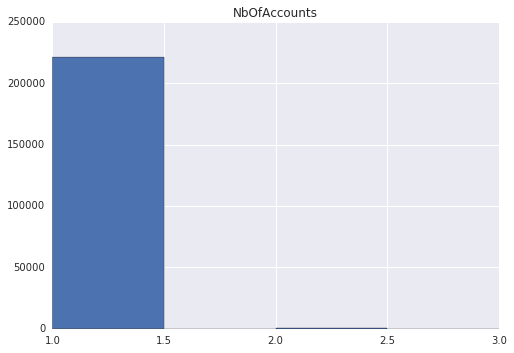

In [74]:
df.hist(column='NbOfAccounts',bins=df['NbOfAccounts'].max()+1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdbb64f0450>]], dtype=object)

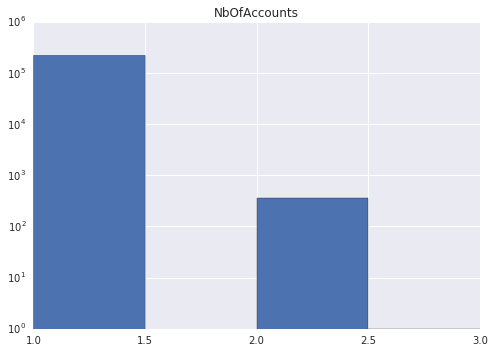

In [75]:
df.hist(column='NbOfAccounts',bins=df['NbOfAccounts'].max()+1,log=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdbb0462890>], dtype=object)

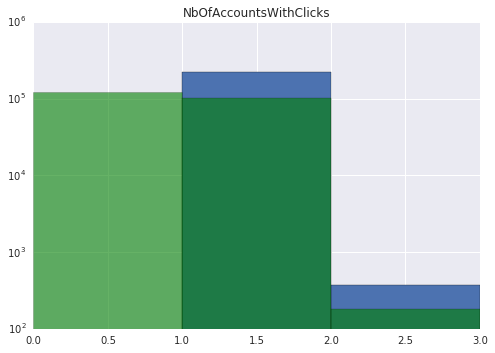

In [76]:
_, ax = plt.subplots()
bins = np.arange(np.max([df['NbOfAccounts'].max(),df['NbOfAccountsWithClicks'].max()])+1)

df.hist(column='NbOfAccounts',bins=bins,log=True,ax=ax)
df.hist(column='NbOfAccountsWithClicks',bins=bins,log=True,ax=ax,color='g',alpha=0.6)

In [77]:
df[df['NbOfAccountsWithClicks'] > 10].sort_values(by=['NbOfAccountsWithClicks'],ascending=False)[:25]

,Criteria,KeywordMatchType,Urls,NbOfAccounts,NbOfAccountsWithClicks


In [70]:
%sql
SELECT
  Criteria,
  KeywordMatchType,
  AccountDescriptiveName,
  CampaignName,
  AdGroupName,
  IF(CriteriaDestinationUrl != ' --',CriteriaDestinationUrl,FinalUrls) as Urls,
  AVG(QualityScore) as AprilQualityScore,
  SUM(Impressions) as Impressions,
  SUM(Clicks) as Clicks,
  SUM(Cost)/1000000 as Cost,
  SUM(AllConversions) as AllConversions,
  SUM(Cost)/SUM(AllConversions)/1000000 as CostPerAllConversion
FROM
 [google.com:ddm-connectors-demo:aw_dataset.KEYWORDS_PERFORMANCE_ANALYTICS]
WHERE True
AND  AdNetworkType2 = 'Google search' 
AND NOT IsNegative 
AND Status = 'enabled' AND AdGroupStatus = 'enabled' AND CampaignStatus = 'enabled'
AND Month = '2016-04-01'
AND Criteria = 'bravo fly' AND KeywordMatchType = 'Exact'
GROUP BY 1,2,3,4,5,6

Criteria,KeywordMatchType,AccountDescriptiveName,CampaignName,AdGroupName,Urls,AprilQualityScore,Impressions,Clicks,Cost,AllConversions,CostPerAllConversion
bravo fly,Exact,BravoFly.com,Brand Bulgaria Exact,Brand Mssp,"[""http://www.bravofly.com/vg1/flights.do?COBRANDED=GMADWORDCOM""]",10.0,3,1,0.01,0.0,
bravo fly,Exact,Bravofly Spagna,Brand Exact,Brand Misspellings,"[""http://www.bravofly.es/vg1/vuelos.do?COBRANDED=BFADWORDES""]",8.0,83,37,2.12,13.0,0.163076923077
bravo fly,Exact,BravoFly.com,Brand Ungheria - Exact,Brand Mssp,"[""http://www.bravofly.hu?COBRANDED=GMADWORDHU""]",10.0,93,53,0.55,3.0,0.183333333333
bravo fly,Exact,Svizzera Italia,Brand Exact,Bravofly Exact,"[""http://it.bravofly.ch/vg1/home.do?COBRANDED=GMADWORDCHI""]",10.0,37,19,0.26,0.0,
bravo fly,Exact,Bravofly COM ROW,Brand Exact,Brand,"[""http://www.bravofly.com/vg1/flights.do?COBRANDED=GMADWORDCOM""]",10.0,358,137,3.39,4.0,0.8475
bravo fly,Exact,BravoFly.com,Brand Croazia Exact,Brand Mssp,"[""http://www.bravofly.com?COBRANDED=GMADWORDCOM""]",8.0,27,13,0.14,1.0,0.14
bravo fly,Exact,Bravofly Austria,Brand Exact,Bravofly Misspellings,"[""http://www.bravofly.at/vg1/home.do?COBRANDED=GMADWORDA""]",10.0,50,21,0.27,2.0,0.135
bravo fly,Exact,BravoFly.com,Brand SK Exact,Brand Mssp,"[""http://www.bravofly.com?COBRANDED=GMADWORDCOM""]",8.0,4,3,0.03,0.0,
bravo fly,Exact,BravoFly.com,Brand Netherlands Exact,Brand Mssp,"[""http://www.bravofly.com/vg1/flights.do?COBRANDED=GMADWORDCOM""]",10.0,59,23,0.23,3.0,0.0766666666667
bravo fly,Exact,BravoFly DE,Brand Exact ROW,Brand Misspellings,"[""http://www.bravofly.de/vg1/flug.do?COBRANDED=GMADWORDDE&sembox_content=[{KeyWord:Brand%20Misspellings}]""]",10.0,42,12,1.5,1.0,1.5
